In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['GLC', 'BGC']
di_sugar2= ['DGlcpa', 'DGlcpb']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 2 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

normalization error 1 SER /B:1
prev: 0 0 0
this: -0.058986 -1.14957 0.703859
guide: 0 -0 0
normalization error 1 SER /B:1
prev: 0 0 0
this: -0.058986 -1.14957 0.703859
guide: 0 -0 0
normalization error 1 SER /B:1
prev: 0 0 0
this: -0.058986 -1.14957 0.703859
guide: 0 -0 0
normalization error 1 SER /B:1
prev: 0 0 0
this: -0.058986 -1.14957 0.703859
guide: 0 -0 0
normalization error 1 SER /B:1
prev: 0 0 0
this: -0.058986 -1.14957 0.703859
guide: 0 -0 0


Executed 2 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 171 
valid torsion1 and torsion2: (171, 171)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.D', '1.D'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['-', '-'])
(['2.J', '1.J'], ['-', '4C1'])
(['2.E', '1.E'], ['-', '4C1'])
(['2.I', '1.I'], ['-', '4C1'])
(['2.F', '1.F'], ['-', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '-'])
(['2.B', '1.B'], ['-', '-'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.H', '1.H'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.J', '1.J'], ['4C1', '4C1'])
(['2.H', '1.H'], ['4C1', '4C1'])
(['2.L', '1.L'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//7jjn.pdb D GLC 2 C1
../../pdbs//7jjn.pdb D BGC 1 O4
8159 8156
Connection found between 8159 and 8156
../../pdbs//7jjn.pdb E GLC 2 C1
../../pdbs//7jjn.pdb E BGC 1 O4
8193 8190
Connection found between 8193 and 8190
../../pdbs//8orp.pdb E GLC 2 C1
../../pdbs//8orp.pdb E BGC 1 O4
7409 7407
Connection found between 7409 and 7407
../../pdbs//8orp.pdb C GLC 2 C1
../../pdbs//8orp.pdb C BGC 1 O4
7334 7332
Connection found between 7334 and 7332
../../pdbs//1veo.pdb B GLC 2 C1
../../pdbs//1veo.pdb B BGC 1 O4
4143 4140
Connection found between 4143 and 4140
../../pdbs//5d5b.pdb B GLC 2 C1
../../pdbs//5d5b.pdb B BGC 1 O4
3560 3557
Connection found between 3560 and 3557
../../pdbs//6kkr.pdb J GLC 2 C1
../../pdbs//6kkr.pdb J BGC 1 O4
8328 8325
Connection found between 8328 and 8325
../../pdbs//6kkr.pdb E GLC 2 C1
../../pdbs//6kkr.pdb E BGC 1 O4
8206 8203
Connection found between 8206 and 8203
../../pdbs//6kkr.pdb I GLC 2 C1
../../pdbs//6kkr.pdb I BGC 1 O4
8306 8303
Connection found betwe

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,7jjn.pdb,D GLC 2 C2 C1 BGC 1 O4 C4,D GLC 2 C1 BGC 1 O4 C4 C5,236.671,246.832,"([GLC(2_D_), BGC(1_D_)], [33.2, 28.41])",GLC(3_D_)-GLC(2_D_)-BGC(1_D_),DGlcpa1-4DGlcpa1-4DGlcpb1-ROH,"([2.D, 1.D], [4C1, 4C1])"
1,7jjn.pdb,E GLC 2 C2 C1 BGC 1 O4 C4,E GLC 2 C1 BGC 1 O4 C4 C5,238.071,246.708,"([GLC(2_E_), BGC(1_E_)], [35.94, 30.22])",GLC(3_E_)-GLC(2_E_)-BGC(1_E_),DGlcpa1-4DGlcpa1-4DGlcpb1-ROH,"([2.E, 1.E], [4C1, 4C1])"
2,8orp.pdb,E GLC 2 C2 C1 BGC 1 O4 C4,E GLC 2 C1 BGC 1 O4 C4 C5,228.962,240.793,"([GLC(2_E_), BGC(1_E_)], [24.53, 44.32])",RY7(3_E_)-GLC(2_E_)-BGC(1_E_),DQuipa1-4DGlcpa1-4DGlcpb1-ROH,"([2.E, 1.E], [4C1, 4C1])"
3,8orp.pdb,C GLC 2 C2 C1 BGC 1 O4 C4,C GLC 2 C1 BGC 1 O4 C4 C5,231.314,238.470,"([GLC(2_C_), BGC(1_C_)], [24.14, 42.21])",RY7(3_C_)-GLC(2_C_)-BGC(1_C_),DQuipa1-4DGlcpa1-4DGlcpb1-ROH,"([2.C, 1.C], [4C1, 4C1])"
4,1veo.pdb,B GLC 2 C2 C1 BGC 1 O4 C4,B GLC 2 C1 BGC 1 O4 C4 C5,184.941,205.011,"([GLC(2_B_), BGC(1_B_)], [18.45, 32.12])",GLC(2_B_)-BGC(1_B_),DGlcpa1-4DGlcpb1-ROH,"([2.B, 1.B], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
166,5lgw.pdb,G GLC 2 C2 C1 BGC 1 O4 C4,G GLC 2 C1 BGC 1 O4 C4 C5,203.476,217.722,"([GLC(2_G_), BGC(1_G_)], [21.65, 21.4])",GLC(2_G_)-BGC(1_G_),DGlcpa1-4DGlcpb1-ROH,"([2.G, 1.G], [4C1, 4C1])"
167,5lgw.pdb,H GLC 2 C2 C1 BGC 1 O4 C4,H GLC 2 C1 BGC 1 O4 C4 C5,202.809,217.483,"([GLC(2_H_), BGC(1_H_)], [22.44, 22.89])",GLC(2_H_)-BGC(1_H_),DGlcpa1-4DGlcpb1-ROH,"([2.H, 1.H], [4C1, 4C1])"
168,5cpt.pdb,D GLC 2 C2 C1 BGC 1 O4 C4,D GLC 2 C1 BGC 1 O4 C4 C5,200.393,212.733,"([GLC(2_D_), BGC(1_D_)], [52.99, 51.35])",GLC(2_D_)-BGC(1_D_)-ASP(373_B_),DGlcpa1-4DGlcpb1-ASP,"([2.D, 1.D], [4C1, 4C1])"
169,5cpt.pdb,C GLC 2 C2 C1 BGC 1 O4 C4,C GLC 2 C1 BGC 1 O4 C4 C5,202.573,212.304,"([GLC(2_C_), BGC(1_C_)], [51.09, 52.63])",GLC(2_C_)-BGC(1_C_)-ASP(373_A_),DGlcpa1-4DGlcpb1-ASP,"([2.C, 1.C], [4C1, 4C1])"


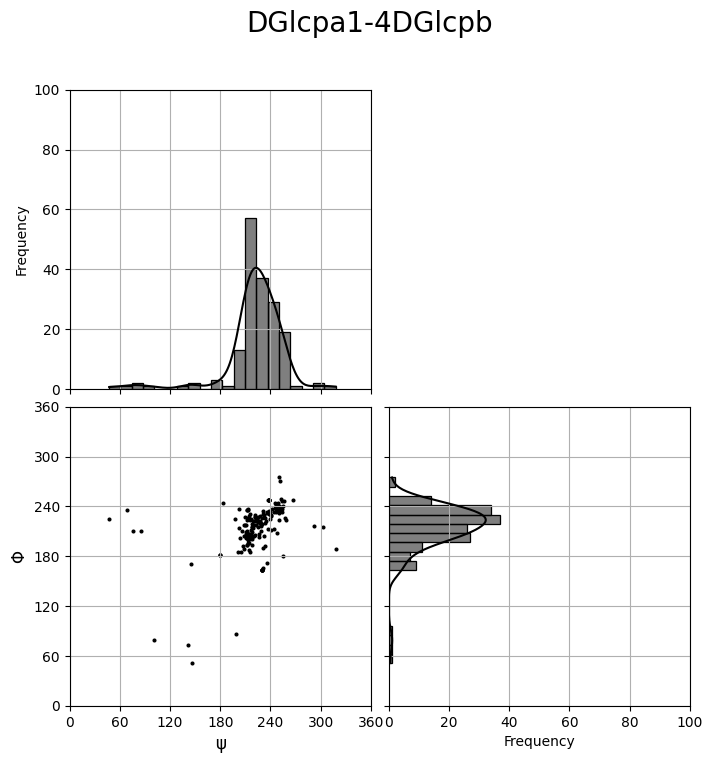

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)